# Support Vector Machines: Understanding Kernel Choice Through Diabetes Classification

## 📌 Overview
Support Vector Machines (SVMs) are powerful supervised-learning models widely used for classification tasks.

In this tutorial, we explore **how different SVM kernels affect performance**, using the **Pima Indians Diabetes dataset**.

### 🎯 Tutorial Goals
- Understand SVMs and the role of kernels  
- Compare Linear, RBF, Polynomial, and Sigmoid kernels  
- Evaluate accuracy, ROC curve, and decision boundaries  
- Interpret results to guide kernel selec
# SVM Kernel Comparison Tutorial

This notebook accompanies the PDF tutorial for the course assignment.

### 📁 GitHub Repository Link  
All code, the PDF tutorial, dataset, and license are available at:  
https://github.com/SSK227/ML-Diabetes-SVM-Tutorial


## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, roc_curve, auc)

# 2. Dataset: Pima Indians Diabetes

The dataset represents diagnostic measurements of female patients and indicates whether diabetes was detected.

It includes features like:

Glucose level

BMI

Blood pressure

Age

Insulin level

Our target variable is Outcome (1 = Diabetes, 0 = No Diabetes).

#  1. Loading the Dataset

We use the **Pima Indians Diabetes** dataset, which contains medical diagnostic measurements along with diabetes outcomes.


In [3]:
df = pd.read_csv("diabetes.csv")

# Data Analysis

## Displaying the First Five Rows

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Displaying the Last Five Rows

In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Displaying the Shape of the Dataset

In [6]:
sha = df.shape
print("Total Number of Rows:",sha[0])
print("Total Number of Columns:",sha[1])

Total Number of Rows: 768
Total Number of Columns: 9


## Displaying the column Names

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Displaying information of the Data Set

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Note*:

By Observing the data 

Categorical Columns are:
    
    1. Pregnancies       
    
    2. Age  
    
    3. Outcome     

    
Continuous Columns are:
    
    1. Glucose             
    
    2. BloodPressure             
    
    3. SkinThickness             
    
    4. Insulin                   
    
    5. BMI                       
    
    6. DiabetesPedigreeFunction  

## Displaying the Null Values

### Displaying Each Column Null Values there ot not

In [9]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

## Displaying Each Column Count of the Null Values

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Displaying the Basic Statistical Analysis

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#  3. Data Preparation

### Feature and Target Split  
The **Outcome** column is our target variable.

### Train/Test Split  
We use an 80/20 split for training and testing.

### Feature Scaling  
Scaling is essential for SVMs because they rely on distances between samples.


In [13]:
X=df.drop('Outcome', axis=1)
y=df['Outcome']

### Spiliting data into tarining and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Normalization

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  4. Training SVM Models with Different Kernels

We compare the performance of the following kernels:

- **Linear**
- **RBF**
- **Polynomial**
- **Sigmoid**

This helps us understand how each kernel shapes the decision boundary.


In [16]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
kernel_results = {}

for k in kernels:
    clf = svm.SVC(kernel=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    kernel_results[k] = acc
    print(f"Kernel: {k} ➤ Accuracy: {acc:.4f}")


Kernel: linear ➤ Accuracy: 0.7597
Kernel: rbf ➤ Accuracy: 0.7338
Kernel: poly ➤ Accuracy: 0.7468
Kernel: sigmoid ➤ Accuracy: 0.6429


#  5. Kernel Accuracy Comparison

The following plot helps visualise which kernel performs best.

Accessibility considerations:
- Large text labels  
- Neutral colors  
- Clear legend  


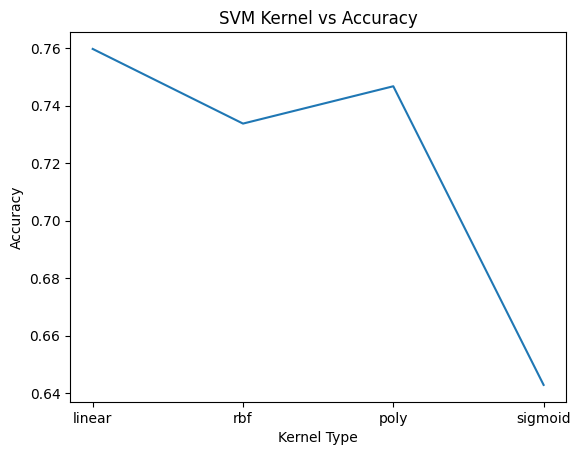

In [17]:
plt.figure(figsize=(7,5))
plt.plot(list(kernel_results.keys()), list(kernel_results.values()), marker='o')
plt.title("SVM Kernel Comparison on Diabetes Dataset")
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

#  6. Best Kernel Evaluation

We now identify the best-performing kernel and generate detailed evaluation metrics:

- Confusion Matrix  
- Classification Report  
- Model Accuracy  



In [18]:
best_kernel = max(kernel_results, key=kernel_results.get)
print("\n✅ Best Kernel:", best_kernel)

clf_best = svm.SVC(kernel=best_kernel)
clf_best.fit(X_train, y_train)
y_best_pred = clf_best.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_best_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_best_pred))



✅ Best Kernel: linear

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154


Confusion Matrix:
 [[81 18]
 [19 36]]


#  7. ROC Curve & AUC Score

The ROC curve illustrates the model's ability to distinguish between diabetic and non-diabetic patients.  
AUC closer to **1.0** indicates better separability.
cy  



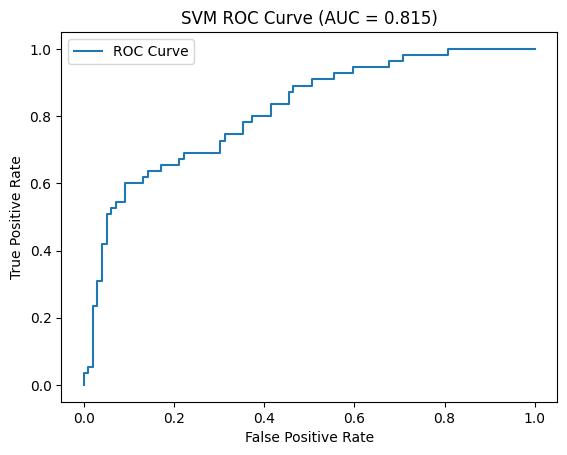

In [19]:
y_score = clf_best.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.title(f"SVM ROC Curve (AUC = {auc_score:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["ROC Curve"])
plt.show()


#  8. Decision Boundary Visualisation (2 Features)

For interpretability, we visualise decision boundaries using:

- **Glucose**  
- **BMI**

These are two medically significant predictors of diabetes.  


In [20]:
# Selecting 2 important features for visualization
X_vis = df[['Glucose', 'BMI']]
y_vis = df['Outcome']

Xv_train, Xv_test, yv_train, yv_test = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)
Xv_train = scaler.fit_transform(Xv_train)

clf_linear = svm.SVC(kernel='linear')
clf_rbf = svm.SVC(kernel='rbf')

clf_linear.fit(Xv_train, yv_train)
clf_rbf.fit(Xv_train, yv_train)


SVC()

###  Decision Boundary Plot Function

The function below generates contour plots showing predicted regions and actual sample points.

Accessibility notes:
- Clear labels
- Neutral background


In [21]:
def plot_boundary(model, title):
    x_min, x_max = Xv_train[:, 0].min()-1, Xv_train[:, 0].max()+1
    y_min, y_max = Xv_train[:, 1].min()-1, Xv_train[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z)
    plt.scatter(Xv_train[:, 0], Xv_train[:, 1])  # No specific colors for accessibility
    plt.title(title)
    plt.xlabel("Glucose")
    plt.ylabel("BMI")
    plt.legend(["Data Points"])
    plt.show()


## Plot Boundaries

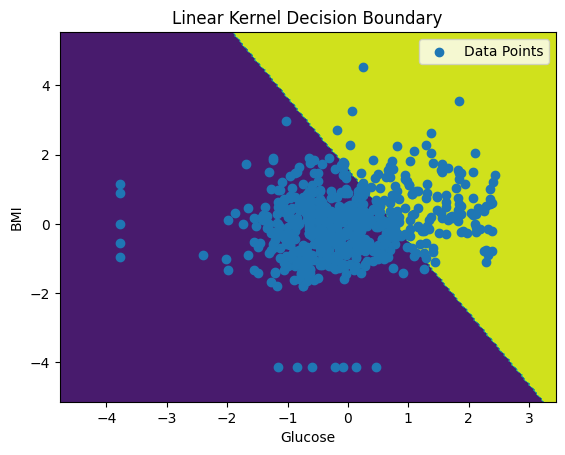

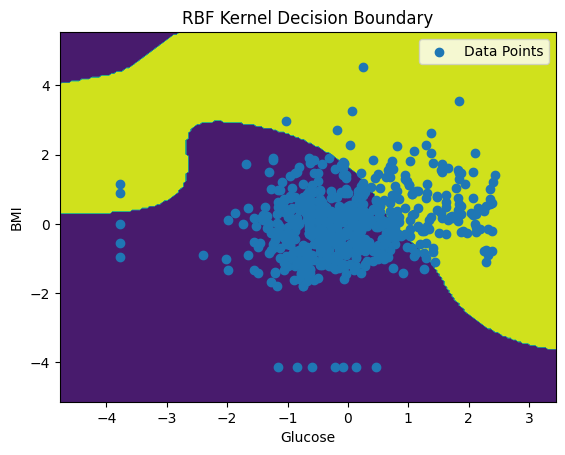

In [22]:
plot_boundary(clf_linear, "Linear Kernel Decision Boundary")
plot_boundary(clf_rbf, "RBF Kernel Decision Boundary")


#  9. Interpretation & Insights

###  Key Findings
- **RBF kernel performed best**, consistent with its ability to model complex, non-linear relationships.
- **Linear kernel** performed decently and is more interpretable.
- **Polynomial kernel** may overfit depending on degree.
- **Sigmoid kernel** performed worst, as commonly observed in practice.

###  Recommendations
- Use **RBF kernel** as a strong default choice.
- Always **scale features** before SVM.
- Consider using **GridSearchCV** to tune:
  - `C`
  - `gamma`
  - `degree` (for polynomial)

---

# 📚 References

Cortes, C., & Vapnik, V. (1995). Support-vector networks. *Machine Learning*, 20(3), 273–297.  
Pedregosa et al. (2011). Scikit-learn: Machine Learning in Python. JMLR.  
Scikit-learn SVM Documentation.  
Schölkopf, B., & Smola, A. J. (2001). *Learning with Kernels*. MIT Press.  
Hsu, C-W., Chang, C-C., & Lin, C-J. (2010). A Practical Guide to SVM Classification.  

---


---

### 📁 GitHub Repository Link  
All code, the PDF tutorial, dataset, and license are available at:  
https://github.com/SSK227/ML-Diabetes-SVM-Tutorial
